*Dataset Characteristics:*
- Size: The dataset consists of a large number of samples, with each sample containing measurements of nitrogen, phosphorus, potassium, and pH values.
- Features: The main features of the dataset include nitrogen level (N), phosphorus level (P), potassium level (K), and soil pH.
- Target: The target variable is the crop recommendation based on the soil attributes provided. This could be a categorical variable representing different crop types or a numerical value indicating the suitability of specific crops. It helps the farmers to get informed decision about the farming strategy.
- Distribution: The dataset covers a diverse range of soil conditions found in agricultural fields, including variations in nutrient levels and pH values across different regions.

*Importing Libraries*

In [39]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings

----------------------------------------------------------------------------------------------------------------------------------------

*Dataset Overview*
- Read dataset
- Dataset information
- Describing dataset's descriptive statistic value
- Finding all unique crops
- Describing correlation of feature to it's label theoritically.

In [40]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [42]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [43]:
total_unique_crops= df['label'].unique()
print(f"Total unique crops: {total_unique_crops.size}")

print("Crops List:")
for n,i in enumerate(total_unique_crops):
    print(f"{n+1}. {i}")

Total unique crops: 22
Crops List:
1. rice
2. maize
3. chickpea
4. kidneybeans
5. pigeonpeas
6. mothbeans
7. mungbean
8. blackgram
9. lentil
10. pomegranate
11. banana
12. mango
13. grapes
14. watermelon
15. muskmelon
16. apple
17. orange
18. papaya
19. coconut
20. cotton
21. jute
22. coffee


*Feature Description:*
- N -> ratio of Nitrogen content in soil. Nitrogen is an essential macronutrient for plant growth.
- P -> ratio of Phosphorous content in soil. Phosphorus is important for root development, flowering, and fruit production.
- K -> ratio of Potassium content in soil. Potassium plays a role in regulating water balance in plants, enhancing disease resistance, and affecting crop quality.
- temperature -> temperature in degree Celsius. Each plant has an optimal temperature range for growth.
- humidity -> relative humidity in %. Air and soil humidity affect transpiration (water evaporation) in plants. 
- ph -> ph value of the soil. The availability of nutrients in the soil is greatly influenced by soil pH. 
- rainfall -> rainfall in mm. Rainfall affects water availability in the soil.
- label -> the recommendated crops(22): apple, banana, blackgram, chickpea, coconut, coffee, cotton, grapes, jute, kidneybeans, lentil, maize, mango, mothbeans, mungbean, muskmelons, orange, papaya, pigeonpeas, pomegranate, rice, watermelon.

----------------------------------------------------------------------------------------------------------------------------------------

EDA

In [44]:
# %pip install plotly
# %pip install --upgrade nbformat

In [45]:
import plotly.graph_objects as go
import matplotlib as plt

In [46]:
indicators = df.columns[:-1]
ylabels = ['The amount of nitrogen (in kg/ha)', 'The amount of phosphorus (in kg/ha)', 'The amount of potassium (in kg/ha)', 'The average temperature (in Celsius)', 'Humidity (in percentage)', 'pH', 'The amount of rainfall (in mm)']
labels = df.label.unique()
N = len(labels)

In [47]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
for j in range(len(indicators)):
    fig = go.Figure()
    for i in range(N):
        fig.add_trace(go.Box(y=df[indicators[j]][df.label == labels[i]], marker_color=c[i], name=labels[i])) 
    fig.update_layout(
        title='Box plots of ' + indicators[j].lower() +  ' distribution',
        yaxis_title=ylabels[j],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(zeroline=False, gridcolor='white'),
        paper_bgcolor='rgb(233,233,233)',
        plot_bgcolor='rgb(233,233,233)',
        font=dict(size=14),
        legend=dict(yanchor="top",y=0.99, xanchor="right",x=0.99)
    )

    fig.show()

In [48]:
for i in range(len(indicators)):
    group_df = df.groupby(df.label)[indicators[i]].mean().sort_values(ascending = True).reset_index()
    fig = go.Figure()
    fig.add_trace(go.Bar(y=group_df[indicators[i]], x=group_df['label'], text=group_df[indicators[i]]))
    fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
    fig.update_layout(
        uniformtext_minsize=8, 
        uniformtext_mode='hide',
        title='Mean values of ' + indicators[i].lower() +  ' in crop for different plants',
        font=dict(size=16)
    )
    fig.show()   

----------------------------------------------------------------------------------------------------------------------------------------

*Data Pre-processing:*
- Handling Missing/Duplicated Values: Remove rows/samples, Imputation.
- Handling Imbalance Labels
- Handling Categorical Feature (label): Label Encoding.
- Data Visualization
- Feature Engineering: Add a NPK Ratio Column.

Cleaning dataset

In [49]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

Data has been cleaned out, then we continue to encode our label with dictionary below.

In [52]:
encoded_label_df = df

crop_dict = { 
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
encoded_label_df['encoded_crop']= encoded_label_df['label'].map(crop_dict)

In [53]:
encoded_label_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


Drop the label column

In [54]:
encoded_label_df = df.drop('label', axis=1)
encoded_label_df.head()

,N,P,K,temperature,humidity,ph,rainfall,encoded_crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


Data Visualization

In [55]:
corr = encoded_label_df.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,encoded_crop
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.317076
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.109993
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.089209
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.031383
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.640925
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.057527
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.311053
encoded_crop,-0.317076,0.109993,-0.089209,-0.031383,-0.640925,0.057527,-0.311053,1.000000


<Axes: >

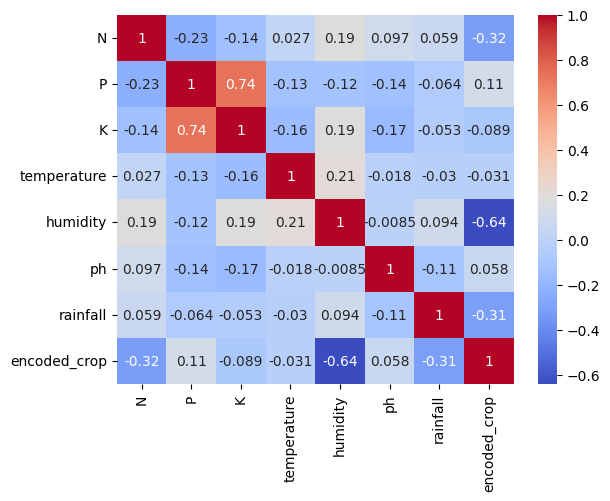

In [56]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

Feature Engineering
- Calculating 3 ratio of NPK: Nitrogen:Phosphorus (N:P), Phosphorus:Potassium (P:K), Potassium:Nitrogen(K:N)
- Add 3 ratio of NPK to the columnn

In [57]:
# Finding zero value causing infinite ratio of N:P or P:K or K:N
zero_value_N = (df['N'] == 0).sum()
zero_value_P = (df['P'] == 0).sum()
zero_value_K = (df['K'] == 0).sum()

# Display the total zero value
print("Sum of zero value in column 'N': ", zero_value_N)
print("Sum of zero value in column 'P': ", zero_value_P)
print("Sum of zero value in column 'K': ", zero_value_K)

Sum of zero value in column 'N':  27
Sum of zero value in column 'P':  0
Sum of zero value in column 'K':  0


In [58]:
npk_df = encoded_label_df

# Adding value 1 to prevent undefined values
# Add column for N:P ratio
npk_df['N:P'] = (npk_df['N']+1) / (npk_df['P']+1)

# Add column for P:K ratio
npk_df['P:K'] = (npk_df['P']+1) / (npk_df['K']+1)

# Add column for K:N ratio
npk_df['K:N'] = (npk_df['K']+1) / (npk_df['N']+1)

npk_df.head()

,N,P,K,temperature,humidity,ph,rainfall,encoded_crop,N:P,P:K,K:N
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,2.116279,0.977273,0.483516
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,1.457627,1.404762,0.488372
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,1.089286,1.244444,0.737705
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,2.083333,0.878049,0.546667
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,1.837209,1.000000,0.544304


*Training*

In [59]:
npk_df_shuffled = npk_df.sample(frac=1, random_state=42)

In [60]:
npk_df_shuffled

,N,P,K,temperature,humidity,ph,rainfall,encoded_crop,N:P,P:K,K:N
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,9,5.666667,0.375000,0.470588
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,10,11.000000,0.173077,0.525253
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,6,0.952381,1.260000,0.833333
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,6,0.737705,1.089286,1.244444
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,8,0.224638,0.686567,6.483871
...,...,...,...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,7,1.833333,1.000000,0.545455
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,13,1.147368,1.979167,0.440367
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,12,0.324324,1.156250,2.666667
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,11,0.096000,0.609756,17.083333


In [61]:
X = npk_df_shuffled.drop('encoded_crop', axis=1)
y = npk_df_shuffled['encoded_crop']

In [62]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall,N:P,P:K,K:N
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,5.666667,0.375000,0.470588
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,11.000000,0.173077,0.525253
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,0.952381,1.260000,0.833333
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,0.737705,1.089286,1.244444
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,0.224638,0.686567,6.483871


In [63]:
y.head()

1451     9
1334    10
1761     6
1735     6
1576     8
Name: encoded_crop, dtype: int64

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.21, random_state=42)

In [65]:
from sklearn.model_selection import cross_val_score

In [68]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
}

warnings.filterwarnings("ignore")

for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy score for the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Print the cross-validation and test accuracy
    print(f"{name} model - Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}, Test Accuracy: {test_accuracy:.4f}")

Logistic Regression model - Cross-Validation Accuracy: 0.9568 ± 0.0086, Test Accuracy: 0.9416
Naive Bayes model - Cross-Validation Accuracy: 0.9862 ± 0.0078, Test Accuracy: 0.9870
Support Vector Machine model - Cross-Validation Accuracy: 0.9735 ± 0.0059, Test Accuracy: 0.9784
K-Nearest Neighbors model - Cross-Validation Accuracy: 0.9781 ± 0.0043, Test Accuracy: 0.9784
Decision Tree model - Cross-Validation Accuracy: 0.9793 ± 0.0078, Test Accuracy: 0.9892
Random Forest model - Cross-Validation Accuracy: 0.9942 ± 0.0041, Test Accuracy: 0.9957
Bagging model - Cross-Validation Accuracy: 0.9879 ± 0.0078, Test Accuracy: 0.9892
AdaBoost model - Cross-Validation Accuracy: 0.1893 ± 0.0176, Test Accuracy: 0.1797
Gradient Boosting model - Cross-Validation Accuracy: 0.9827 ± 0.0026, Test Accuracy: 0.9848
Extra Trees model - Cross-Validation Accuracy: 0.9931 ± 0.0039, Test Accuracy: 0.9913


Highest: Random Forest with 99,42%

__GridSearchCV - Hyperparameter Tuning__

In [73]:
# Define the parameter grid for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']},
    'Naive Bayes': {},
    'Support Vector Machine': {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1], 'kernel': ['rbf', 'linear']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Bagging': {'n_estimators': [10, 20, 50], 'max_samples': [0.5, 1.0], 'max_features': [0.5, 1.0]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'Extra Trees': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt', 'log2']},
}

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
}

metrics = ['precision', 'recall', 'f1-score']

# Create an empty dictionary to store results
model_results = {}

# Ignore warnings
warnings.filterwarnings("ignore")

# Iterate over models and perform hyperparameter tuning and evaluation
for name, model in models.items():
    print(f"Evaluating {name} model...")
    
    if name in param_grids and param_grids[name]:
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        # Evaluate using cross-validation on the training set
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    else:
        # Directly fit the model and evaluate using cross-validation on the training set
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        model.fit(X_train, y_train)
        best_model = model

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy score
    print(f"Accuracy of {name} model: {accuracy:.4f}")
    print(f"Cross-Validation Accuracy of {name} model: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the relevant metrics
    model_results[name] = {metric: report['macro avg'][metric] for metric in metrics}
    
    # Print classification report
    print(f"Classification Report for {name} model:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 80)  # Optional separator between reports

    # Create the "best_model" folder if it doesn't exist
    os.makedirs("Model", exist_ok=True) 

    # Save the best model using Pickle
    with open(os.path.join("Model", f"{accuracy:.4f}_{name}_model.pkl"), 'wb') as f:
        pickle.dump(best_model, f)

# Print the summary of results
print("\nSummary of model results:")
for name, metrics in model_results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Evaluating Logistic Regression model...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy of Logistic Regression model: 0.9567
Cross-Validation Accuracy of Logistic Regression model: 0.9689 ± 0.0090
Classification Report for Logistic Regression model:

              precision    recall  f1-score   support

           1       0.68      0.93      0.79        14
           2       0.94      0.94      0.94        18
           3       0.96      0.76      0.85        29
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        23
          13       1.00  

<Axes: >

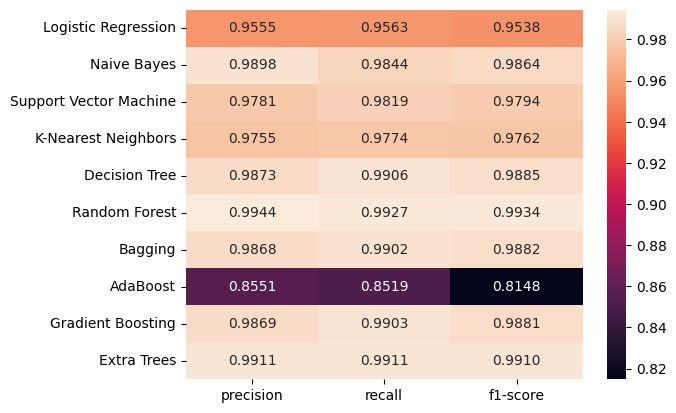

In [74]:
# Create pandas DataFrame from results
model_score_df = pd.DataFrame(model_results).transpose()

# Create heatmap with Seaborn
sns.heatmap(model_score_df, annot=True, fmt='.4f', cbar=True)

From hyperparameter tuning and cross validation to avoid overfitting, we can conclude and utilize Random Forest as our model for recommendating crops. Score for Random Forest:
1. Accuracy: 99,35%
2. 5-Fold Cross Validation: 99,37%
3. Precision: 99,44%
4. Recall: 99,27%
5. F1-Score: 99,34%